In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [61]:
dataFrame = pd.read_csv("alzheimer.csv")

In [62]:
dataFrame.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [63]:
dataFrame.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [64]:
dataFrame.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [65]:
imputer = SimpleImputer(missing_values= np.nan, strategy= "mean")

In [66]:
meanValue = dataFrame.iloc[:,4:6].values

In [67]:
meanValue

array([[ 2., 27.],
       [ 2., 30.],
       [nan, 23.],
       [nan, 28.],
       [nan, 22.],
       [ 3., 28.],
       [ 3., 27.],
       [ 4., 28.],
       [ 4., 29.],
       [ 4., 30.],
       [nan, 28.],
       [nan, 27.],
       [nan, 27.],
       [ 2., 30.],
       [ 2., 29.],
       [ 2., 27.],
       [ 2., 24.],
       [ 3., 30.],
       [ 3., 29.],
       [ 2., 29.],
       [ 2., 29.],
       [ 2., 29.],
       [ 4., 30.],
       [ 4., 30.],
       [ 4., 29.],
       [ 3., 21.],
       [ 3., 16.],
       [ 4., 25.],
       [ 4., 23.],
       [ 3., 29.],
       [ 3., 27.],
       [ 3., 30.],
       [ 3., 27.],
       [ 1., 30.],
       [ 1., 29.],
       [ 1., 27.],
       [ 1., 29.],
       [ 1., 28.],
       [ 1., 26.],
       [ 1., 26.],
       [ 1., 25.],
       [ 3., 30.],
       [ 3., 29.],
       [ 4., 21.],
       [ 4., 21.],
       [ 3., 27.],
       [ 3., 27.],
       [ 3., 29.],
       [ 3., 30.],
       [ 3., 30.],
       [ 3., 30.],
       [ 2., 22.],
       [ 2.,

In [68]:
imputer = imputer.fit(meanValue)

In [69]:
meanValue = imputer.transform(meanValue)

In [70]:
meanValue

array([[ 2.        , 27.        ],
       [ 2.        , 30.        ],
       [ 2.46045198, 23.        ],
       [ 2.46045198, 28.        ],
       [ 2.46045198, 22.        ],
       [ 3.        , 28.        ],
       [ 3.        , 27.        ],
       [ 4.        , 28.        ],
       [ 4.        , 29.        ],
       [ 4.        , 30.        ],
       [ 2.46045198, 28.        ],
       [ 2.46045198, 27.        ],
       [ 2.46045198, 27.        ],
       [ 2.        , 30.        ],
       [ 2.        , 29.        ],
       [ 2.        , 27.        ],
       [ 2.        , 24.        ],
       [ 3.        , 30.        ],
       [ 3.        , 29.        ],
       [ 2.        , 29.        ],
       [ 2.        , 29.        ],
       [ 2.        , 29.        ],
       [ 4.        , 30.        ],
       [ 4.        , 30.        ],
       [ 4.        , 29.        ],
       [ 3.        , 21.        ],
       [ 3.        , 16.        ],
       [ 4.        , 25.        ],
       [ 4.        ,

In [71]:
dataFrame["SES"] = meanValue[:,0]

In [72]:
dataFrame["MMSE"] = meanValue[:,1]

In [73]:
dataFrame

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [74]:
teshis = dataFrame.iloc[:,0:1].values

In [75]:
teshis

array([['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Converted'],
       ['Demented'],
       ['Demented'],
       ['Nondemented'],
       ['Nondemented'],
       ['Demented'],
       

In [76]:
le = preprocessing.LabelEncoder()

In [77]:
teshis = le.fit_transform(teshis)

/Users/yarenuyaroglu/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
teshis

array([2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0,
       0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1,

In [79]:
dataFrame["Group"] = teshis

In [80]:
dataFrame.rename(columns ={'M/F':'mf'},inplace=True)

In [81]:
nondemented= dataFrame[dataFrame.Group == 2]
converted = dataFrame[dataFrame.Group == 0]
demented = dataFrame[dataFrame.Group == 1]

In [82]:
cinsiyet = dataFrame.iloc[:,1:2].values

In [83]:
le = preprocessing.LabelEncoder()

In [84]:
cinsiyet = le.fit_transform(cinsiyet)

/Users/yarenuyaroglu/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
male= dataFrame[dataFrame.mf == 1]
female= dataFrame[dataFrame.mf== 0]

In [86]:
#dataFrame.rename(columns ={'mf':'M/F'},inplace=True)

In [87]:
#dataFrame["M/F"] = cinsiyet

In [88]:
dataFrame["mf"] = cinsiyet

In [89]:
dataFrame

,Group,mf,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,2,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,1,1,82,16,1.000000,28.0,0.5,1693,0.694,1.037
369,1,1,86,16,1.000000,26.0,0.5,1688,0.675,1.040
370,2,0,61,13,2.000000,30.0,0.0,1319,0.801,1.331
371,2,0,63,13,2.000000,30.0,0.0,1327,0.796,1.323


In [90]:
dataFrame.corr()

,Group,mf,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,-0.143918,-0.049267,0.100606,0.053290,0.339906,-0.572518,0.056693,0.258093,-0.042848
mf,-0.143918,1.000000,-0.037726,0.089279,-0.044525,-0.166521,0.202140,0.572549,-0.249618,-0.561647
Age,-0.049267,-0.037726,1.000000,-0.027886,-0.046665,0.055607,-0.026257,0.042348,-0.518359,-0.035067
EDUC,0.100606,0.089279,-0.027886,1.000000,-0.708680,0.194454,-0.153121,0.257015,-0.012200,-0.241752
SES,0.053290,-0.044525,-0.046665,-0.708680,1.000000,-0.146913,0.073393,-0.254271,0.089436,0.246673
MMSE,0.339906,-0.166521,0.055607,0.194454,-0.146913,1.000000,-0.679837,-0.031789,0.341857,0.039494
CDR,-0.572518,0.202140,-0.026257,-0.153121,0.073393,-0.679837,1.000000,0.022819,-0.344819,-0.029340
eTIV,0.056693,0.572549,0.042348,0.257015,-0.254271,-0.031789,0.022819,1.000000,-0.210122,-0.988877
nWBV,0.258093,-0.249618,-0.518359,-0.012200,0.089436,0.341857,-0.344819,-0.210122,1.000000,0.213476
ASF,-0.042848,-0.561647,-0.035067,-0.241752,0.246673,0.039494,-0.029340,-0.988877,0.213476,1.000000


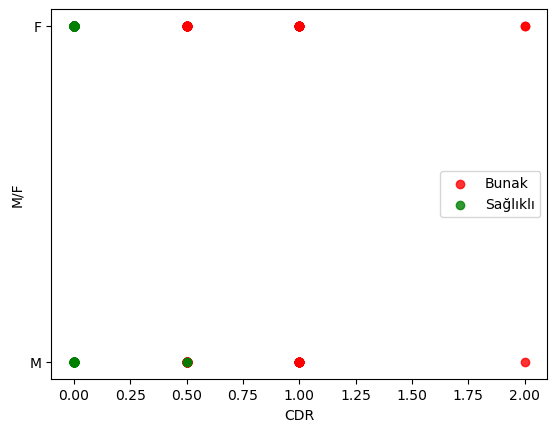

In [91]:
plt.scatter(demented.CDR,demented.mf, color="red", label="Bunak", alpha = 0.8)
plt.scatter(nondemented.CDR, nondemented.mf, color="green", label="Sağlıklı", alpha = 0.8)
plt.xlabel("CDR")
plt.ylabel("M/F")
plt.legend()
plt.show()

In [92]:
dataFrame["Group"].value_counts() #hangi grupta kaç veri var

Group
2    190
1    146
0     37
Name: count, dtype: int64

In [93]:
dataFrame.columns

Index(['Group', 'mf', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

In [94]:
x = dataFrame[['mf', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV','ASF']].values

In [95]:
y= dataFrame["Group"].values

In [96]:
dataFrame.isnull().sum()

Group    0
mf       0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
from sklearn.model_selection import train_test_split 

In [103]:
from sklearn.metrics import accuracy_score

In [306]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.44, random_state= 1)

In [307]:
x= preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [308]:
print("Train set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Train set: (208, 9) (208,)
Test set: (165, 9) (165,)


In [309]:
from sklearn import neighbors

In [310]:
k=5

In [311]:
knn = neighbors.KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)

In [312]:
knn

KNeighborsClassifier()

In [313]:
y_pred = knn.predict(x_test)

In [314]:
from sklearn import metrics

In [315]:
print("eğitim verisi doğruluğu : ", metrics.accuracy_score(y_train, knn.predict(x_train)))
print("test verisi doğruluğu : ", metrics.accuracy_score(y_test, y_pred))


eğitim verisi doğruluğu :  0.9086538461538461
test verisi doğruluğu :  0.9030303030303031


In [316]:
sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print(sayac, "  ", "Doğruluk oranı: %", knn_yeni.score(x_test,y_test)*100)
    sayac += 1
    

1    Doğruluk oranı: % 86.06060606060606
2    Doğruluk oranı: % 79.39393939393939
3    Doğruluk oranı: % 90.30303030303031
4    Doğruluk oranı: % 87.87878787878788
5    Doğruluk oranı: % 90.30303030303031
6    Doğruluk oranı: % 90.30303030303031
7    Doğruluk oranı: % 92.12121212121212
8    Doğruluk oranı: % 90.30303030303031
9    Doğruluk oranı: % 89.6969696969697
10    Doğruluk oranı: % 89.0909090909091


In [317]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk Oranı: {accuracy:.2f}")

Doğruluk Oranı: 0.90


In [209]:
r2 = r2_score(y_test, y_pred)
print(f"R^2 Skoru: {r2:.2f}")

NameError: name 'r2_score' is not defined

In [210]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

NameError: name 'mean_absolute_error' is not defined

In [211]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

NameError: name 'mean_squared_error' is not defined

In [203]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

NameError: name 'mse' is not defined